/tmp/ipykernel_16858/1733648229.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.all_prices = yf.download(tickers=self.config['combined_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed
/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


Market Index Risk: 0.00011708177666824404
Returns for: AAPL, Date
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
2020-12-31   -0.007702
                ...   
2025-09-15    0.011236
2025-09-16    0.006126
2025-09-17    0.003527
2025-09-18   -0.004645
2025-09-19    0.032033
Name: AAPL, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.002712
2020-12-28    0.030766
2020-12-29   -0.018315
2020-12-30   -0.013527
2020-12-31   -0.012702
                ...   
2025-09-15    0.006236
2025-09-16    0.001126
2025-09-17   -0.001473
2025-09-18   -0.009645
2025-09-19    0.027033
Name: AAPL, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;---

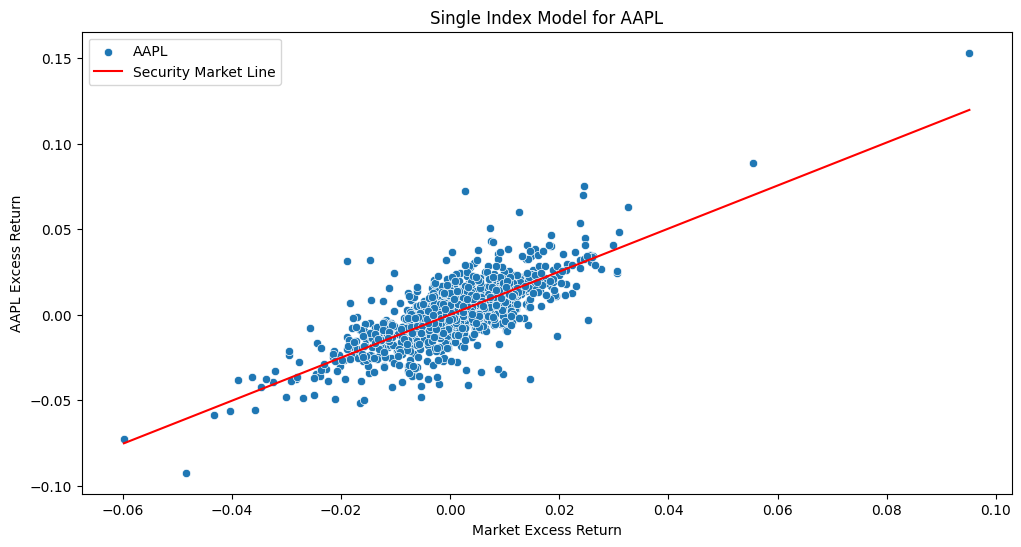

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


Returns for: MSFT, Date
2020-12-24    0.007828
2020-12-28    0.009921
2020-12-29   -0.003601
2020-12-30   -0.011019
2020-12-31    0.003338
                ...   
2025-09-15    0.010708
2025-09-16   -0.012263
2025-09-17    0.001925
2025-09-18   -0.003078
2025-09-19    0.018645
Name: MSFT, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.002828
2020-12-28    0.004921
2020-12-29   -0.008601
2020-12-30   -0.016019
2020-12-31   -0.001662
                ...   
2025-09-15    0.005708
2025-09-16   -0.017263
2025-09-17   -0.003075
2025-09-18   -0.008078
2025-09-19    0.013645
Name: MSFT, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24 

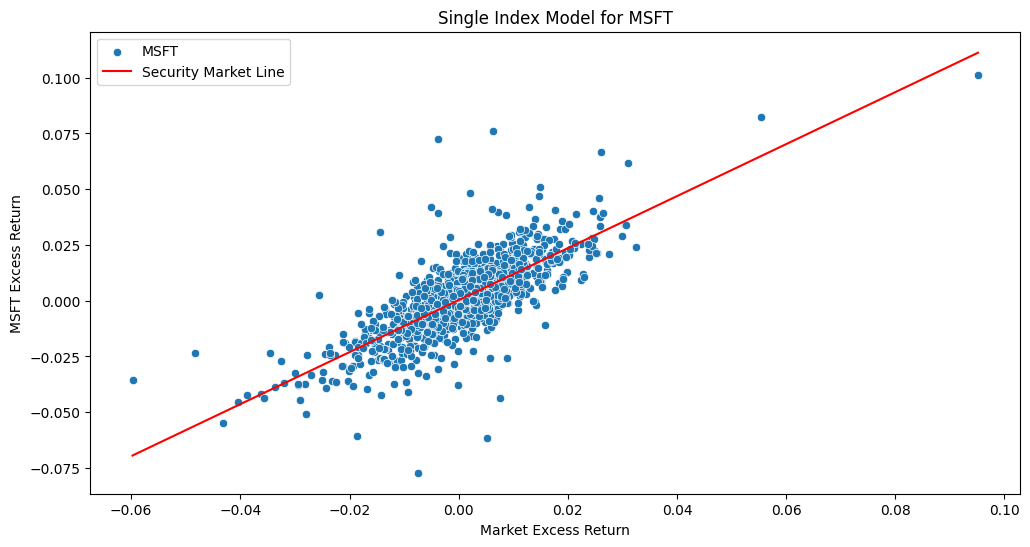

Returns for: TGT, Date
2020-12-24    0.001601
2020-12-28    0.006850
2020-12-29   -0.007654
2020-12-30   -0.006627
2020-12-31    0.015240
                ...   
2025-09-15   -0.015562
2025-09-16    0.013099
2025-09-17   -0.008805
2025-09-18    0.005510
2025-09-19   -0.014426
Name: TGT, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.003399
2020-12-28    0.001850
2020-12-29   -0.012654
2020-12-30   -0.011627
2020-12-31    0.010240
                ...   
2025-09-15   -0.020562
2025-09-16    0.008099
2025-09-17   -0.013805
2025-09-18    0.000510
2025-09-19   -0.019426
Name: TGT, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


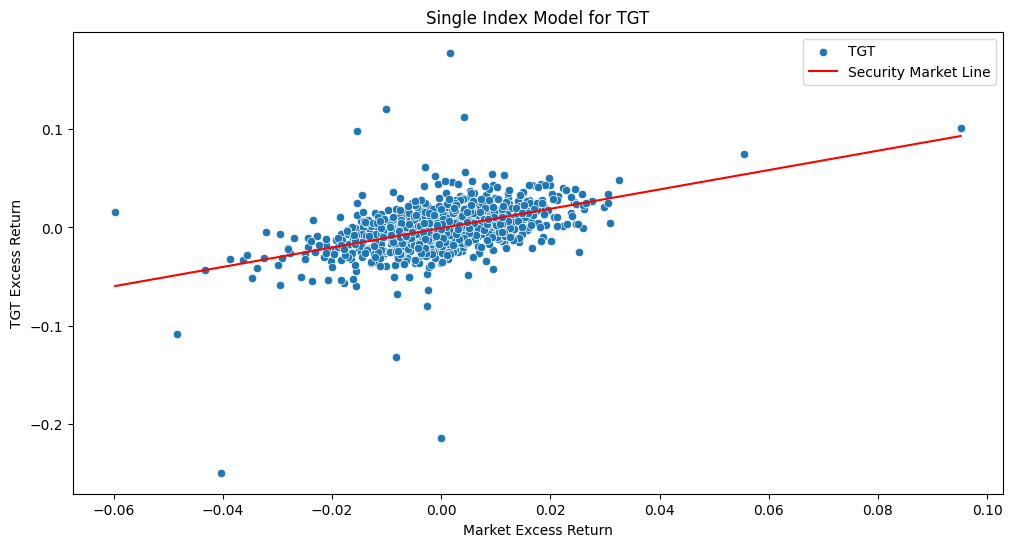

Returns for: GM, Date
2020-12-24   -0.020495
2020-12-28    0.001924
2020-12-29   -0.002160
2020-12-30    0.006495
2020-12-31   -0.004780
                ...   
2025-09-15    0.007692
2025-09-16   -0.008312
2025-09-17    0.004619
2025-09-18    0.009024
2025-09-19   -0.004725
Name: GM, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.025495
2020-12-28   -0.003076
2020-12-29   -0.007160
2020-12-30    0.001495
2020-12-31   -0.009780
                ...   
2025-09-15    0.002692
2025-09-16   -0.013312
2025-09-17   -0.000381
2025-09-18    0.004024
2025-09-19   -0.009725
Name: GM, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    0.0

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


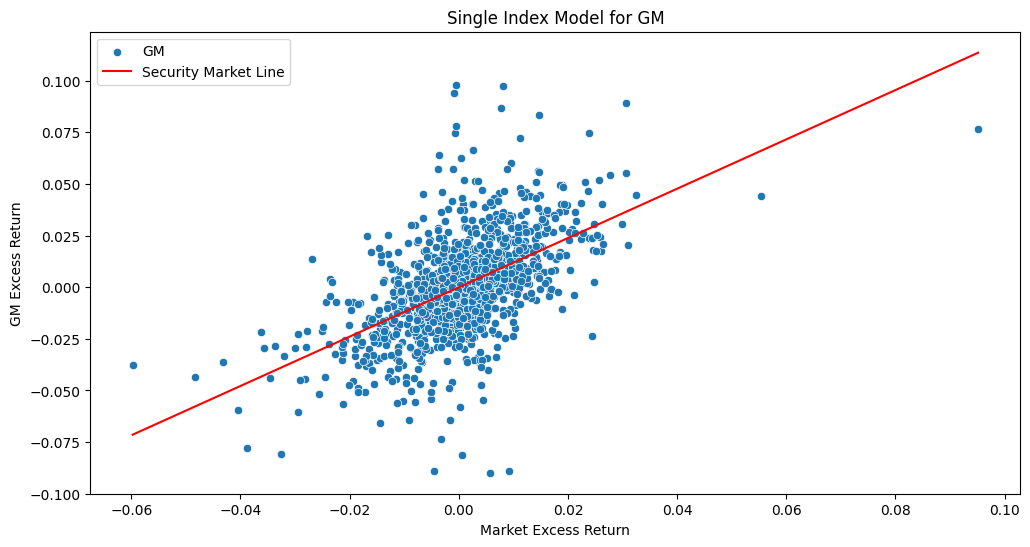

Returns for: F, Date
2020-12-24   -0.014461
2020-12-28    0.003386
2020-12-29   -0.007874
2020-12-30    0.004535
2020-12-31   -0.007900
                ...   
2025-09-15    0.000000
2025-09-16   -0.005993
2025-09-17    0.004307
2025-09-18    0.006861
2025-09-19   -0.010221
Name: F, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.019461
2020-12-28   -0.001614
2020-12-29   -0.012874
2020-12-30   -0.000465
2020-12-31   -0.012900
                ...   
2025-09-15   -0.005000
2025-09-16   -0.010993
2025-09-17   -0.000693
2025-09-18    0.001861
2025-09-19   -0.015221
Name: F, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    0.0035

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


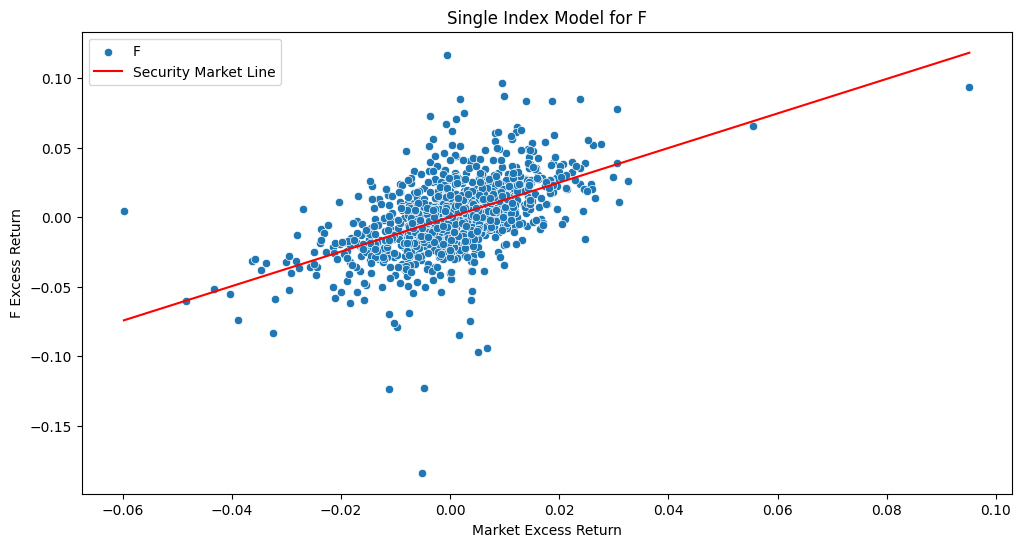

Returns for: WMT, Date
2020-12-24    0.001955
2020-12-28    0.011986
2020-12-29   -0.006335
2020-12-30   -0.000831
2020-12-31   -0.000208
                ...   
2025-09-15    0.001933
2025-09-16   -0.002604
2025-09-17    0.008219
2025-09-18   -0.006426
2025-09-19   -0.012259
Name: WMT, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.003045
2020-12-28    0.006986
2020-12-29   -0.011335
2020-12-30   -0.005831
2020-12-31   -0.005208
                ...   
2025-09-15   -0.003067
2025-09-16   -0.007604
2025-09-17    0.003219
2025-09-18   -0.011426
2025-09-19   -0.017259
Name: WMT, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


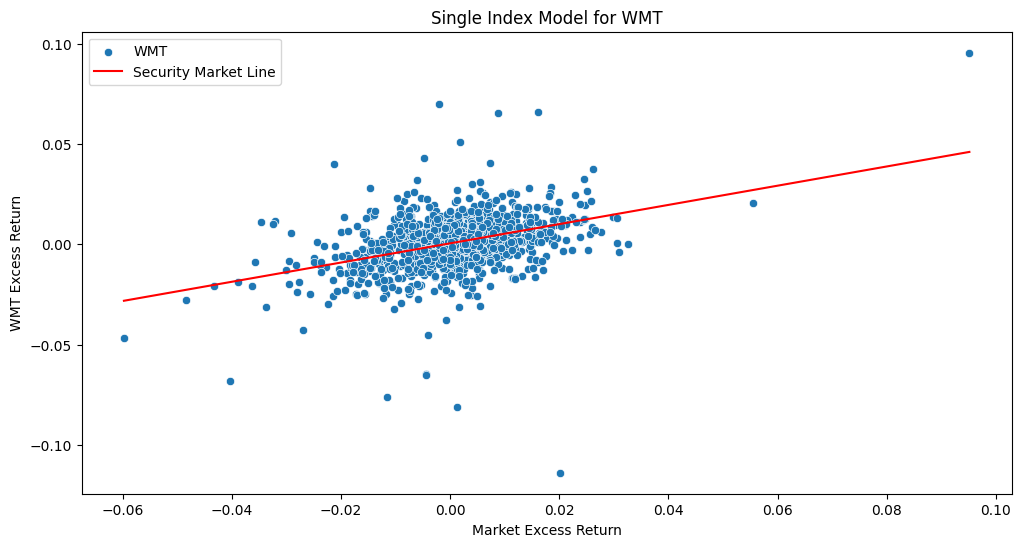

Returns for: MCD, Date
2020-12-24   -0.002971
2020-12-28    0.012442
2020-12-29   -0.006121
2020-12-30   -0.005406
2020-12-31    0.014275
                ...   
2025-09-15   -0.010904
2025-09-16    0.004039
2025-09-17    0.005539
2025-09-18   -0.012559
2025-09-19    0.004118
Name: MCD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.007971
2020-12-28    0.007442
2020-12-29   -0.011121
2020-12-30   -0.010406
2020-12-31    0.009275
                ...   
2025-09-15   -0.015904
2025-09-16   -0.000961
2025-09-17    0.000539
2025-09-18   -0.017559
2025-09-19   -0.000882
Name: MCD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


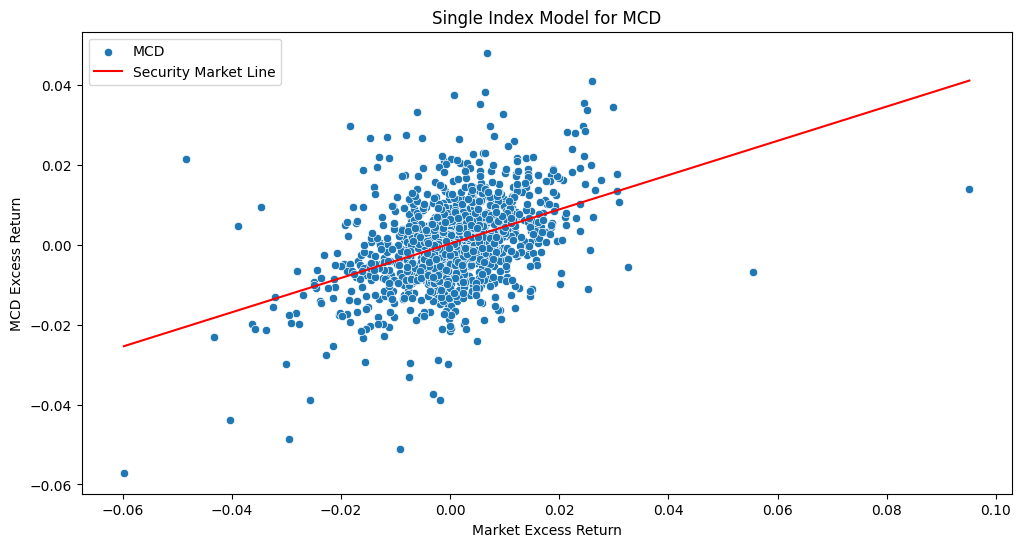

Returns for: SBUX, Date
2020-12-24   -0.000490
2020-12-28    0.022841
2020-12-29    0.012363
2020-12-30    0.003219
2020-12-31    0.009531
                ...   
2025-09-15    0.009524
2025-09-16    0.020440
2025-09-17   -0.013630
2025-09-18    0.002403
2025-09-19    0.013666
Name: SBUX, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.005490
2020-12-28    0.017841
2020-12-29    0.007363
2020-12-30   -0.001781
2020-12-31    0.004531
                ...   
2025-09-15    0.004524
2025-09-16    0.015440
2025-09-17   -0.018630
2025-09-18   -0.002597
2025-09-19    0.008666
Name: SBUX, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24 

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


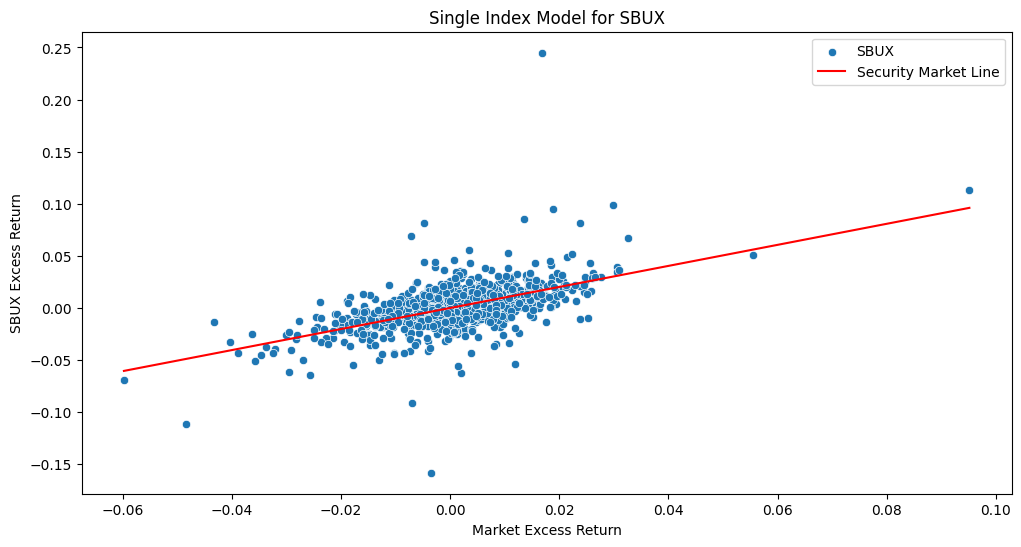

Returns for: TSLA, Date
2020-12-24    0.024443
2020-12-28    0.002901
2020-12-29    0.003466
2020-12-30    0.043229
2020-12-31    0.015674
                ...   
2025-09-15    0.035611
2025-09-16    0.028241
2025-09-17    0.010056
2025-09-18   -0.021157
2025-09-19    0.022118
Name: TSLA, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.019443
2020-12-28   -0.002099
2020-12-29   -0.001534
2020-12-30    0.038229
2020-12-31    0.010674
                ...   
2025-09-15    0.030611
2025-09-16    0.023241
2025-09-17    0.005056
2025-09-18   -0.026157
2025-09-19    0.017118
Name: TSLA, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24 

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


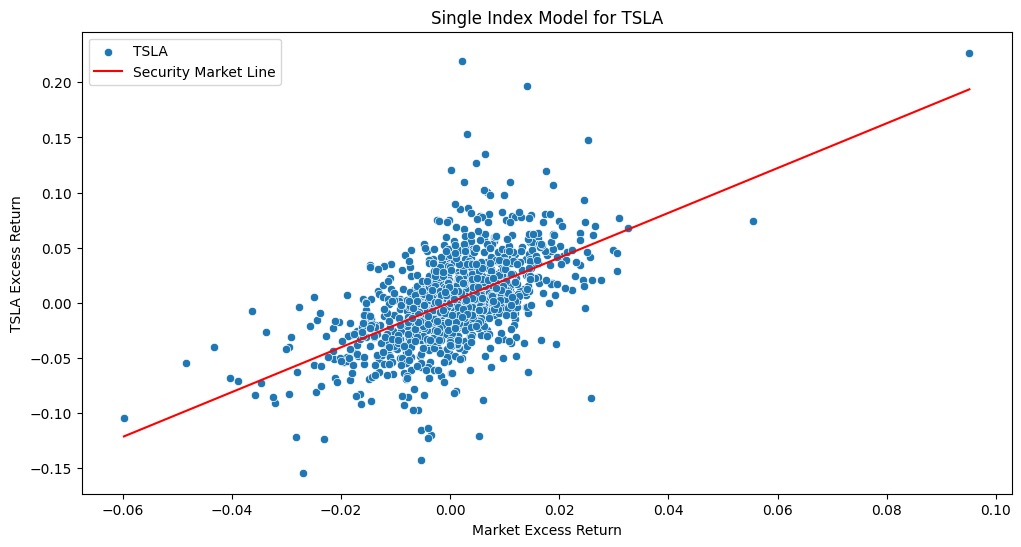

Returns for: GOOGL, Date
2020-12-24    0.003431
2020-12-28    0.022951
2020-12-29   -0.009132
2020-12-30   -0.012237
2020-12-31    0.009440
                ...   
2025-09-15    0.044892
2025-09-16   -0.001788
2025-09-17   -0.006490
2025-09-18    0.010019
2025-09-19    0.010673
Name: GOOGL, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.001569
2020-12-28    0.017951
2020-12-29   -0.014132
2020-12-30   -0.017237
2020-12-31    0.004440
                ...   
2025-09-15    0.039892
2025-09-16   -0.006788
2025-09-17   -0.011490
2025-09-18    0.005019
2025-09-19    0.005673
Name: GOOGL, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


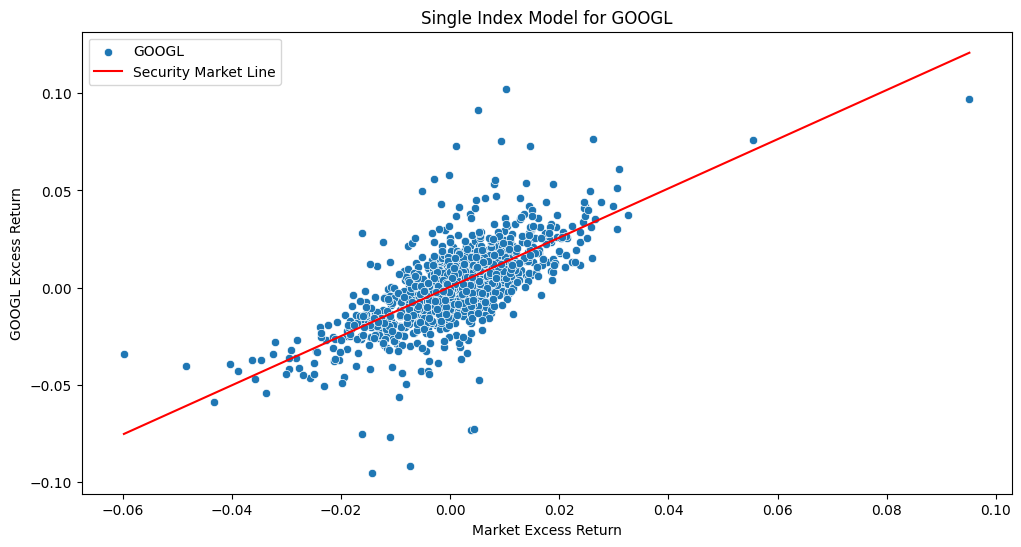

Returns for: SPY, Date
2020-12-24    0.003891
2020-12-28    0.008591
2020-12-29   -0.001908
2020-12-30    0.001427
2020-12-31    0.005081
                ...   
2025-09-15    0.005324
2025-09-16   -0.001377
2025-09-17   -0.001242
2025-09-18    0.004672
2025-09-19    0.004953
Name: SPY, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.001109
2020-12-28    0.003591
2020-12-29   -0.006908
2020-12-30   -0.003573
2020-12-31    0.000081
                ...   
2025-09-15    0.000324
2025-09-16   -0.006377
2025-09-17   -0.006242
2025-09-18   -0.000328
2025-09-19   -0.000047
Name: SPY, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


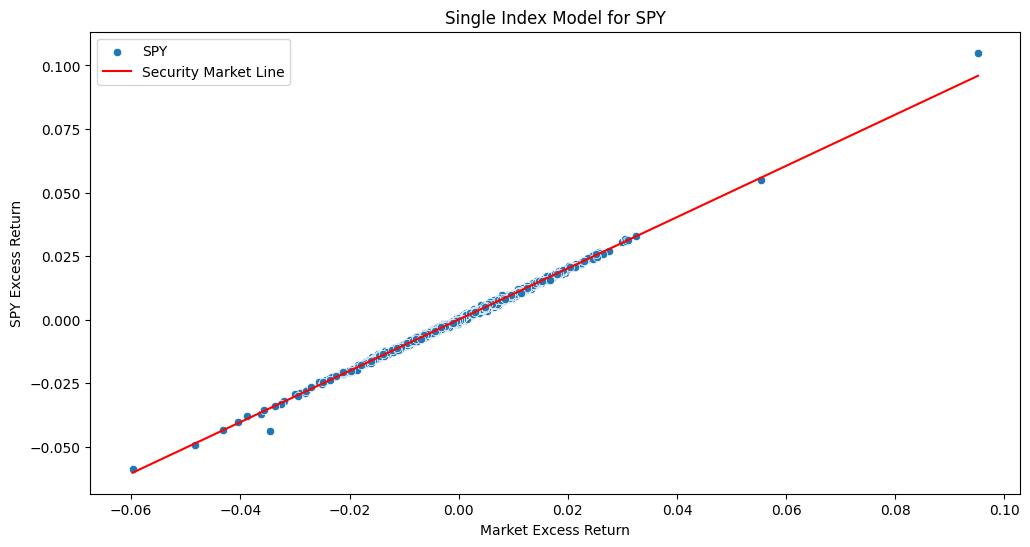

Returns for: QQQ, Date
2020-12-24    0.004413
2020-12-28    0.010079
2020-12-29    0.000895
2020-12-30    0.000032
2020-12-31    0.002460
                ...   
2025-09-15    0.008557
2025-09-16   -0.000845
2025-09-17   -0.001996
2025-09-18    0.009017
2025-09-19    0.006769
Name: QQQ, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.000587
2020-12-28    0.005079
2020-12-29   -0.004105
2020-12-30   -0.004968
2020-12-31   -0.002540
                ...   
2025-09-15    0.003557
2025-09-16   -0.005845
2025-09-17   -0.006996
2025-09-18    0.004017
2025-09-19    0.001769
Name: QQQ, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


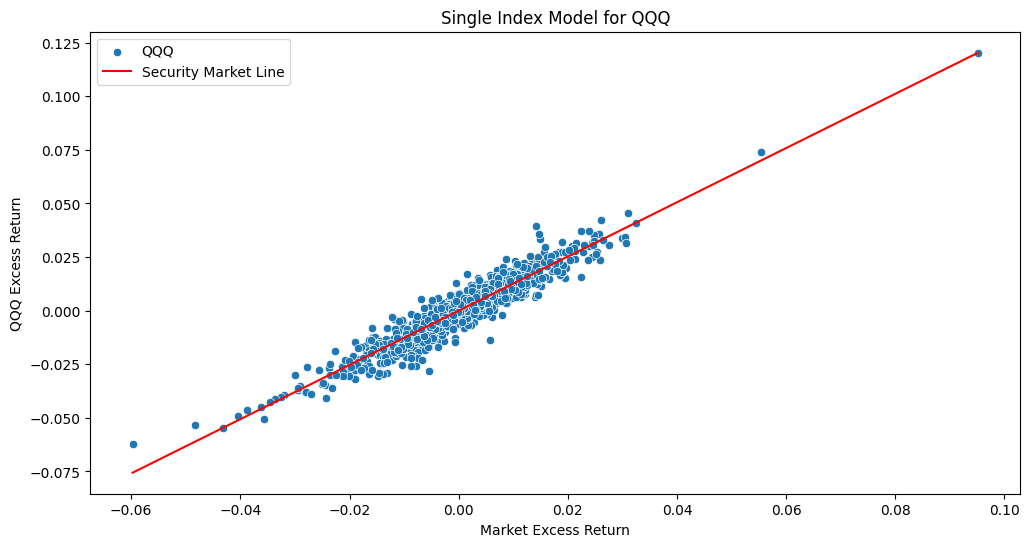

Returns for: VTI, Date
2020-12-24    0.001673
2020-12-28    0.006327
2020-12-29   -0.004174
2020-12-30    0.002691
2020-12-31    0.004594
                ...   
2025-09-15    0.004872
2025-09-16   -0.001350
2025-09-17   -0.000891
2025-09-18    0.006305
2025-09-19    0.003759
Name: VTI, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.003327
2020-12-28    0.001327
2020-12-29   -0.009174
2020-12-30   -0.002309
2020-12-31   -0.000406
                ...   
2025-09-15   -0.000128
2025-09-16   -0.006350
2025-09-17   -0.005891
2025-09-18    0.001305
2025-09-19   -0.001241
Name: VTI, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


ANOVA Table:                             OLS Regression Results                            
Dep. Variable:                    VTI   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.119e+05
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:05:30   Log-Likelihood:                 6366.3
No. Observations:                1189   AIC:                        -1.273e+04
Df Residuals:                    1187   BIC:                        -1.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.146e-06   3.32e-05     -0

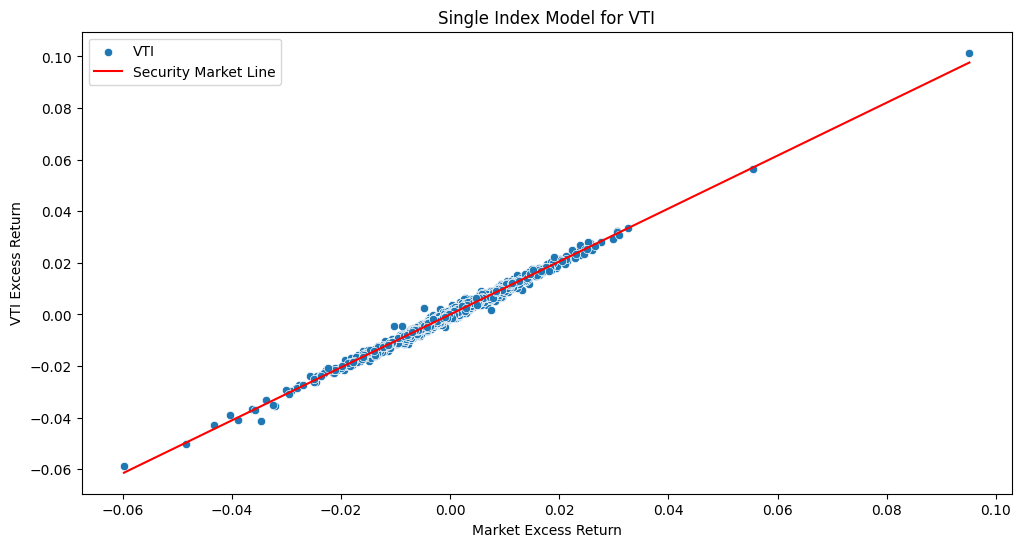

Returns for: VOO, Date
2020-12-24    0.003996
2020-12-28    0.008698
2020-12-29   -0.002104
2020-12-30    0.001348
2020-12-31    0.005382
                ...   
2025-09-15    0.005211
2025-09-16   -0.001317
2025-09-17   -0.001154
2025-09-18    0.004702
2025-09-19    0.004664
Name: VOO, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.001004
2020-12-28    0.003698
2020-12-29   -0.007104
2020-12-30   -0.003652
2020-12-31    0.000382
                ...   
2025-09-15    0.000211
2025-09-16   -0.006317
2025-09-17   -0.006154
2025-09-18   -0.000298
2025-09-19   -0.000336
Name: VOO, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


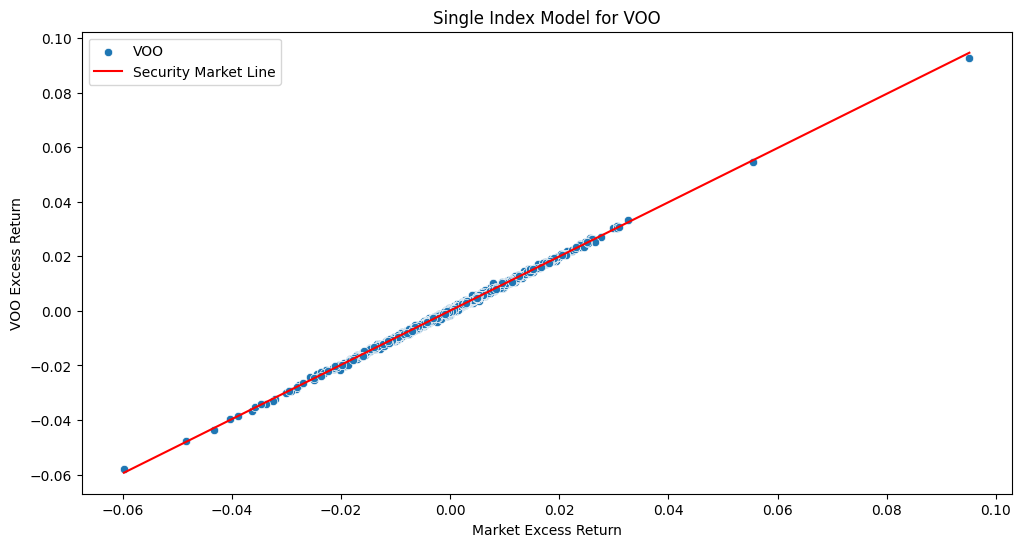

Returns for: ARKK, Date
2020-12-24   -0.014301
2020-12-28   -0.024280
2020-12-29   -0.026895
2020-12-30    0.022362
2020-12-31   -0.020535
                ...   
2025-09-15    0.014637
2025-09-16    0.016432
2025-09-17   -0.004443
2025-09-18    0.030867
2025-09-19    0.021645
Name: ARKK, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.019301
2020-12-28   -0.029280
2020-12-29   -0.031895
2020-12-30    0.017362
2020-12-31   -0.025535
                ...   
2025-09-15    0.009637
2025-09-16    0.011432
2025-09-17   -0.009443
2025-09-18    0.025867
2025-09-19    0.016645
Name: ARKK, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24 

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


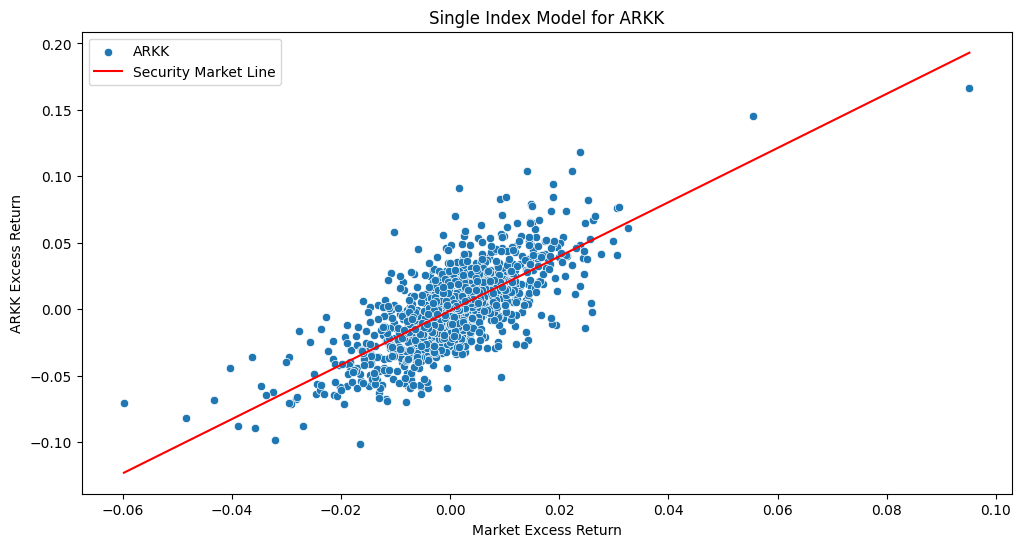

Returns for: IWM, Date
2020-12-24   -0.000653
2020-12-28   -0.003718
2020-12-29   -0.019368
2020-12-30    0.010184
2020-12-31   -0.001782
                ...   
2025-09-15    0.004238
2025-09-16   -0.001647
2025-09-17    0.002560
2025-09-18    0.024907
2025-09-19   -0.007597
Name: IWM, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.005653
2020-12-28   -0.008718
2020-12-29   -0.024368
2020-12-30    0.005184
2020-12-31   -0.006782
                ...   
2025-09-15   -0.000762
2025-09-16   -0.006647
2025-09-17   -0.002440
2025-09-18    0.019907
2025-09-19   -0.012597
Name: IWM, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


ANOVA Table:                             OLS Regression Results                            
Dep. Variable:                    IWM   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2776.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          5.12e-313
Time:                        17:05:30   Log-Likelihood:                 4060.1
No. Observations:                1189   AIC:                            -8116.
Df Residuals:                    1187   BIC:                            -8106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1

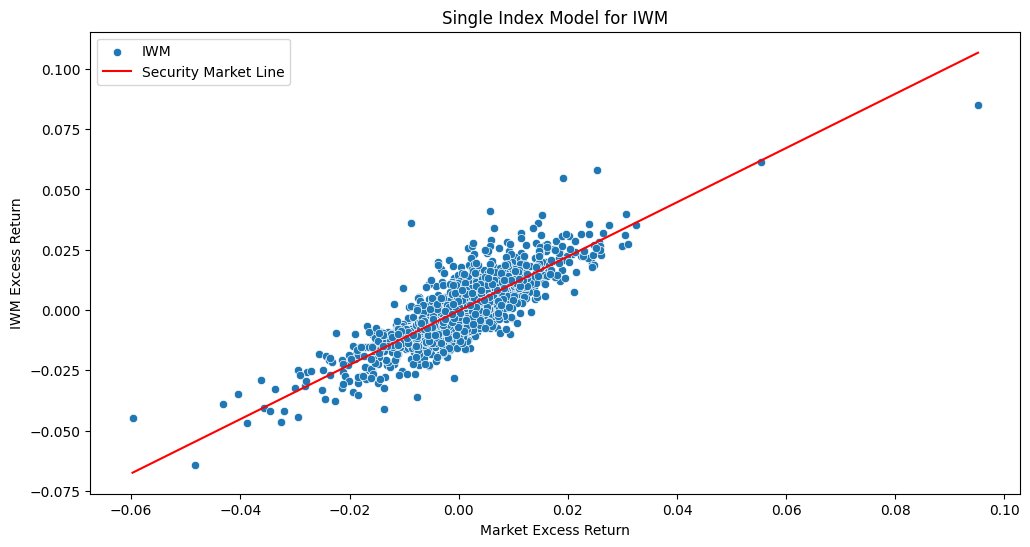

Returns for: DIA, Date
2020-12-24    0.002456
2020-12-28    0.006556
2020-12-29   -0.001776
2020-12-30    0.002208
2020-12-31    0.005458
                ...   
2025-09-15    0.001633
2025-09-16   -0.002804
2025-09-17    0.005406
2025-09-18    0.002970
2025-09-19    0.003529
Name: DIA, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.002544
2020-12-28    0.001556
2020-12-29   -0.006776
2020-12-30   -0.002792
2020-12-31    0.000458
                ...   
2025-09-15   -0.003367
2025-09-16   -0.007804
2025-09-17    0.000406
2025-09-18   -0.002030
2025-09-19   -0.001471
Name: DIA, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


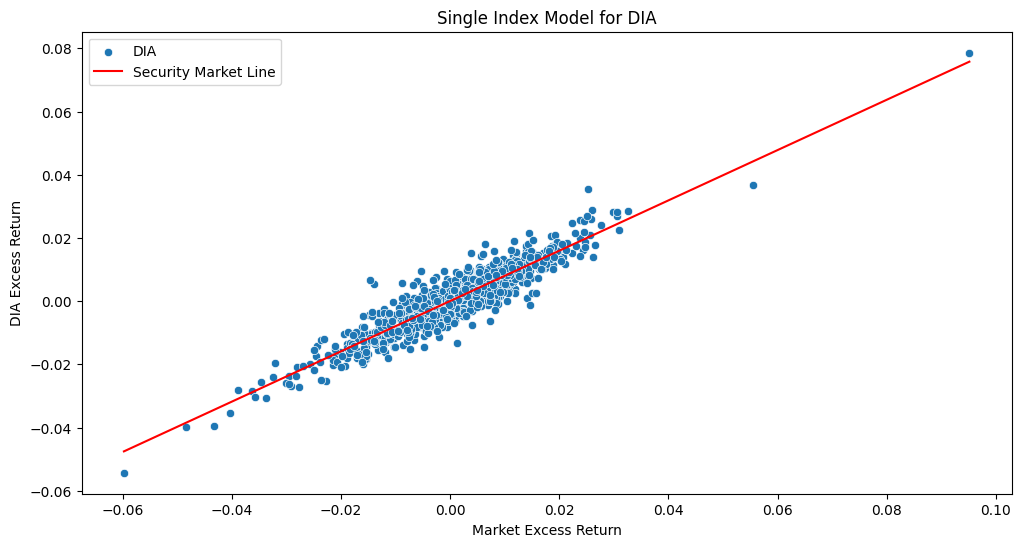

Returns for: XLF, Date
2020-12-24    0.001384
2020-12-28    0.004836
2020-12-29   -0.003437
2020-12-30    0.004484
2020-12-31    0.012363
                ...   
2025-09-15   -0.002230
2025-09-16   -0.002235
2025-09-17    0.009709
2025-09-18    0.000925
2025-09-19    0.002217
Name: XLF, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.003616
2020-12-28   -0.000164
2020-12-29   -0.008437
2020-12-30   -0.000516
2020-12-31    0.007363
                ...   
2025-09-15   -0.007230
2025-09-16   -0.007235
2025-09-17    0.004709
2025-09-18   -0.004075
2025-09-19   -0.002783
Name: XLF, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


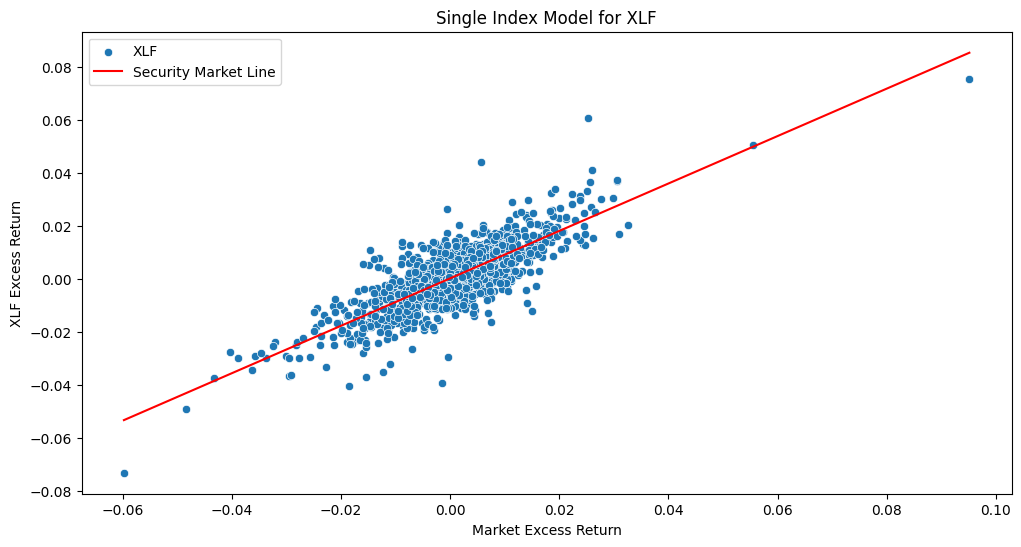

Returns for: XLK, Date
2020-12-24    0.006630
2020-12-28    0.011313
2020-12-29   -0.004750
2020-12-30   -0.000539
2020-12-31    0.001463
                ...   
2025-09-15    0.009008
2025-09-16   -0.003476
2025-09-17   -0.003451
2025-09-18    0.017279
2025-09-19    0.010141
Name: XLK, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.001630
2020-12-28    0.006313
2020-12-29   -0.009750
2020-12-30   -0.005539
2020-12-31   -0.003537
                ...   
2025-09-15    0.004008
2025-09-16   -0.008476
2025-09-17   -0.008451
2025-09-18    0.012279
2025-09-19    0.005141
Name: XLK, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


ANOVA Table:                             OLS Regression Results                            
Dep. Variable:                    XLK   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     7589.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:05:31   Log-Likelihood:                 4444.4
No. Observations:                1189   AIC:                            -8885.
Df Residuals:                    1187   BIC:                            -8875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.865e-05      0.000      0

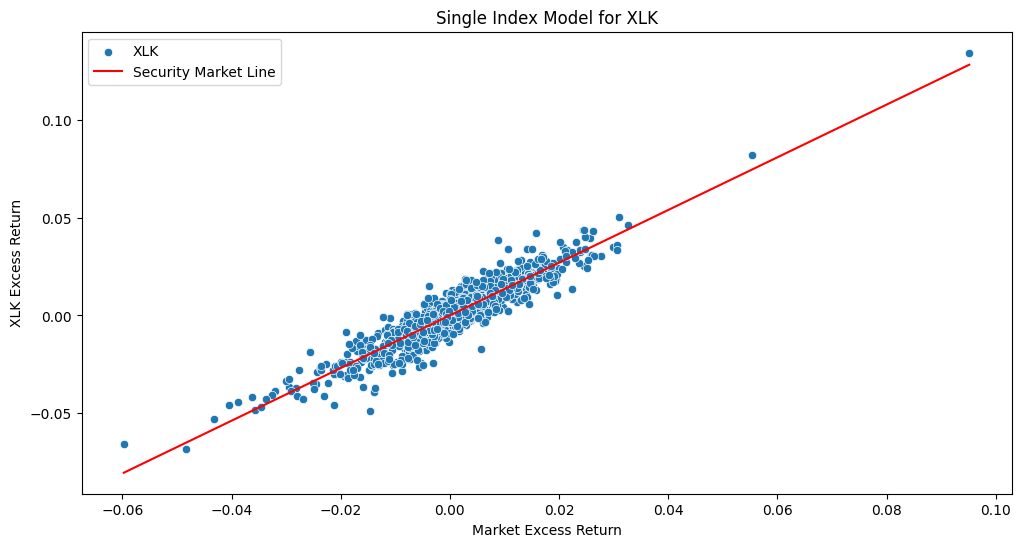

Returns for: EFA, Date
2020-12-24    0.000415
2020-12-28    0.008154
2020-12-29    0.006443
2020-12-30    0.001362
2020-12-31   -0.007617
                ...   
2025-09-15    0.006667
2025-09-16   -0.002778
2025-09-17   -0.003749
2025-09-18    0.003871
2025-09-19   -0.003856
Name: EFA, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.004585
2020-12-28    0.003154
2020-12-29    0.001443
2020-12-30   -0.003638
2020-12-31   -0.012617
                ...   
2025-09-15    0.001667
2025-09-16   -0.007778
2025-09-17   -0.008749
2025-09-18   -0.001129
2025-09-19   -0.008856
Name: EFA, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-24    

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


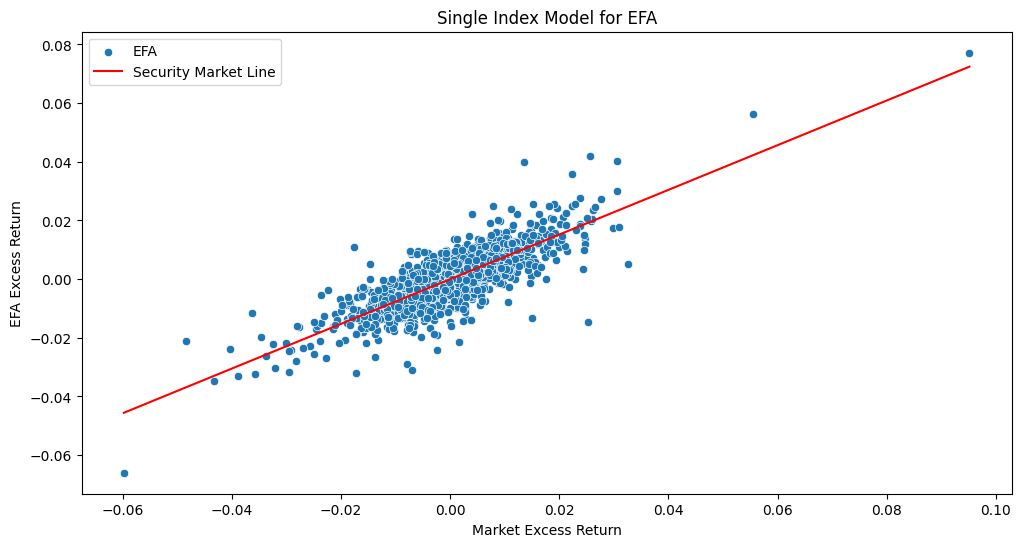

Returns for: BTC-USD, Date
2020-12-24    0.021281
2020-12-28    0.141088
2020-12-29    0.010250
2020-12-30    0.054034
2020-12-31    0.005574
                ...   
2025-09-15   -0.005656
2025-09-16    0.012112
2025-09-17   -0.003207
2025-09-18    0.005741
2025-09-19   -0.012365
Name: BTC-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.016281
2020-12-28    0.136088
2020-12-29    0.005250
2020-12-30    0.049034
2020-12-31    0.000574
                ...   
2025-09-15   -0.010656
2025-09-16    0.007112
2025-09-17   -0.008207
2025-09-18    0.000741
2025-09-19   -0.017365
Name: BTC-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


ANOVA Table:                             OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     174.0
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           3.58e-37
Time:                        17:05:31   Log-Likelihood:                 2289.0
No. Observations:                1189   AIC:                            -4574.
Df Residuals:                    1187   BIC:                            -4564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      1

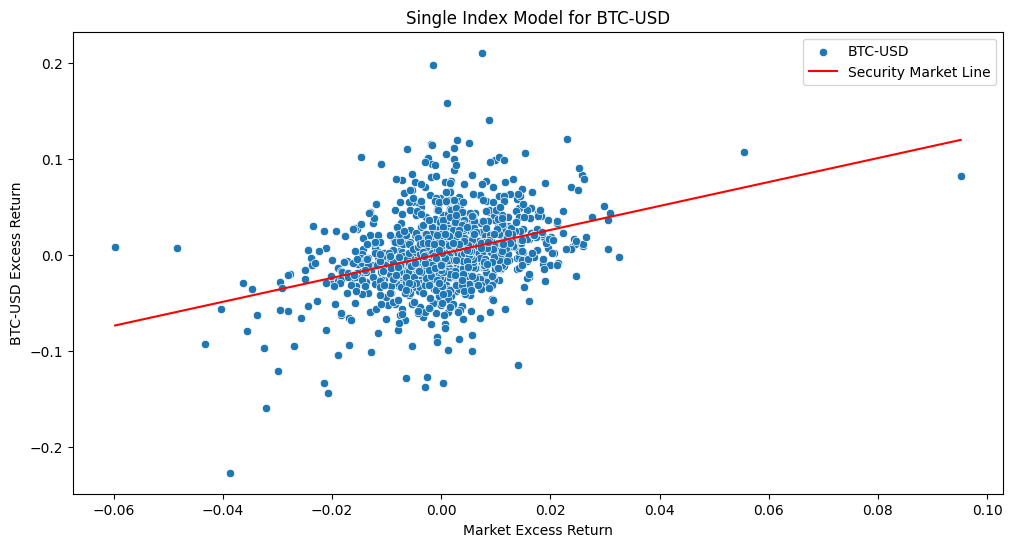

Returns for: ETH-USD, Date
2020-12-24    0.047785
2020-12-28    0.194226
2020-12-29    0.001537
2020-12-30    0.027475
2020-12-31   -0.018381
                ...   
2025-09-15   -0.039961
2025-09-16   -0.005137
2025-09-17    0.019800
2025-09-18   -0.000613
2025-09-19   -0.025927
Name: ETH-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.042785
2020-12-28    0.189226
2020-12-29   -0.003463
2020-12-30    0.022475
2020-12-31   -0.023381
                ...   
2025-09-15   -0.044961
2025-09-16   -0.010137
2025-09-17    0.014800
2025-09-18   -0.005613
2025-09-19   -0.030927
Name: ETH-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


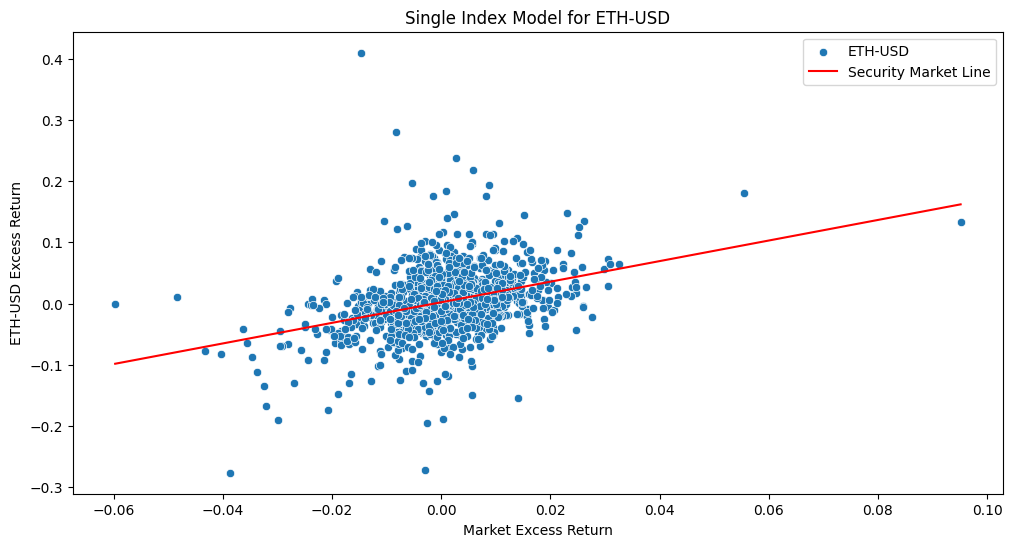

Returns for: XRP-USD, Date
2020-12-24    0.306328
2020-12-28   -0.266003
2020-12-29   -0.108873
2020-12-30   -0.041337
2020-12-31    0.037851
                ...   
2025-09-15   -0.035568
2025-09-16    0.013808
2025-09-17    0.015303
2025-09-18   -0.002828
2025-09-19   -0.027441
Name: XRP-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.301328
2020-12-28   -0.271003
2020-12-29   -0.113873
2020-12-30   -0.046337
2020-12-31    0.032851
                ...   
2025-09-15   -0.040568
2025-09-16    0.008808
2025-09-17    0.010303
2025-09-18   -0.007828
2025-09-19   -0.032441
Name: XRP-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


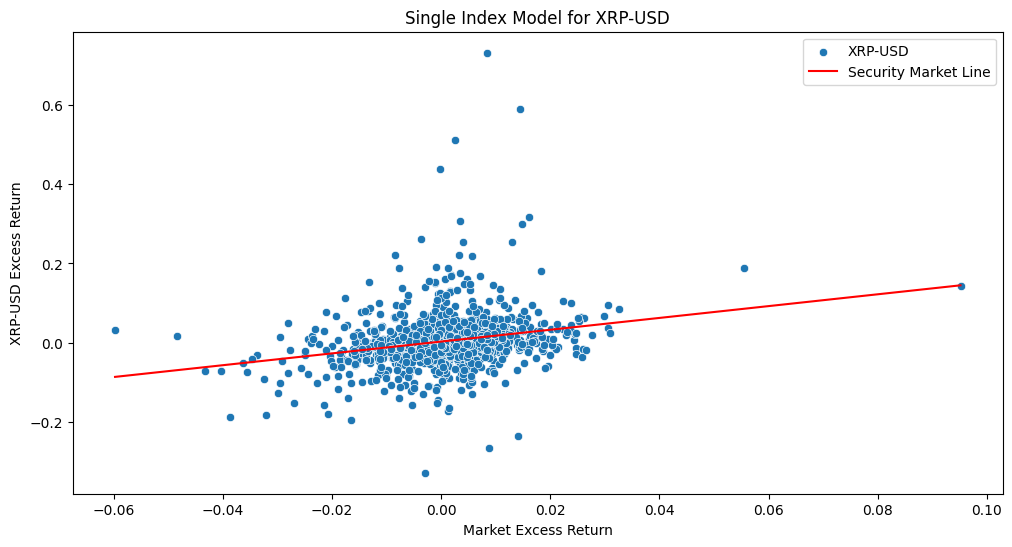

Returns for: USDT-USD, Date
2020-12-24    0.000505
2020-12-28   -0.001328
2020-12-29   -0.000013
2020-12-30    0.001687
2020-12-31    0.000323
                ...   
2025-09-15   -0.000288
2025-09-16    0.000094
2025-09-17    0.000026
2025-09-18   -0.000323
2025-09-19    0.000419
Name: USDT-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.004495
2020-12-28   -0.006328
2020-12-29   -0.005013
2020-12-30   -0.003313
2020-12-31   -0.004677
                ...   
2025-09-15   -0.005288
2025-09-16   -0.004906
2025-09-17   -0.004974
2025-09-18   -0.005323
2025-09-19   -0.004581
Name: USDT-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


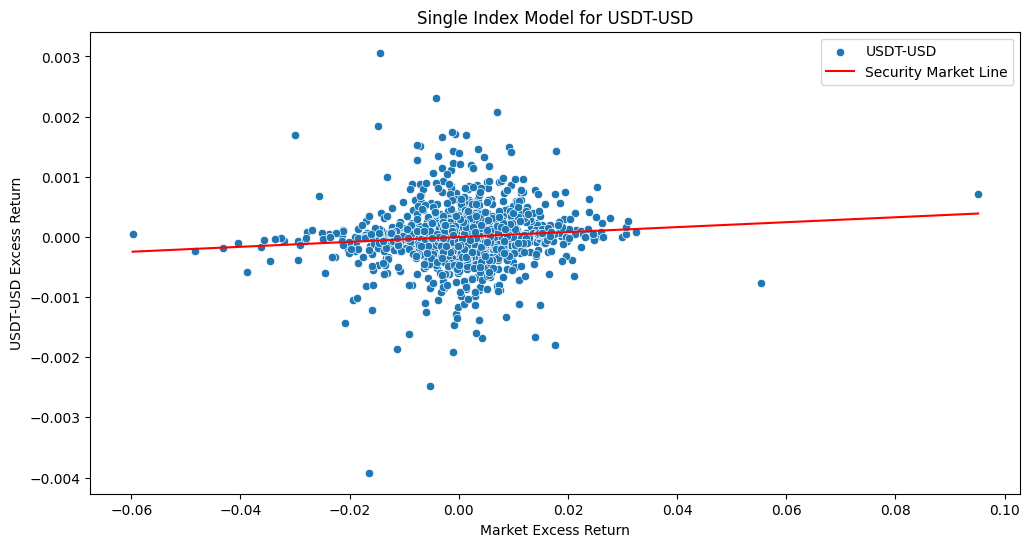

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


Returns for: BNB-USD, Date
2020-12-24    0.045106
2020-12-28    0.102889
2020-12-29    0.086715
2020-12-30   -0.020962
2020-12-31   -0.019935
                ...   
2025-09-15   -0.005471
2025-09-16    0.038852
2025-09-17    0.036200
2025-09-18   -0.008557
2025-09-19    0.002331
Name: BNB-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.040106
2020-12-28    0.097889
2020-12-29    0.081715
2020-12-30   -0.025962
2020-12-31   -0.024935
                ...   
2025-09-15   -0.010471
2025-09-16    0.033852
2025-09-17    0.031200
2025-09-18   -0.013557
2025-09-19   -0.002669
Name: BNB-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

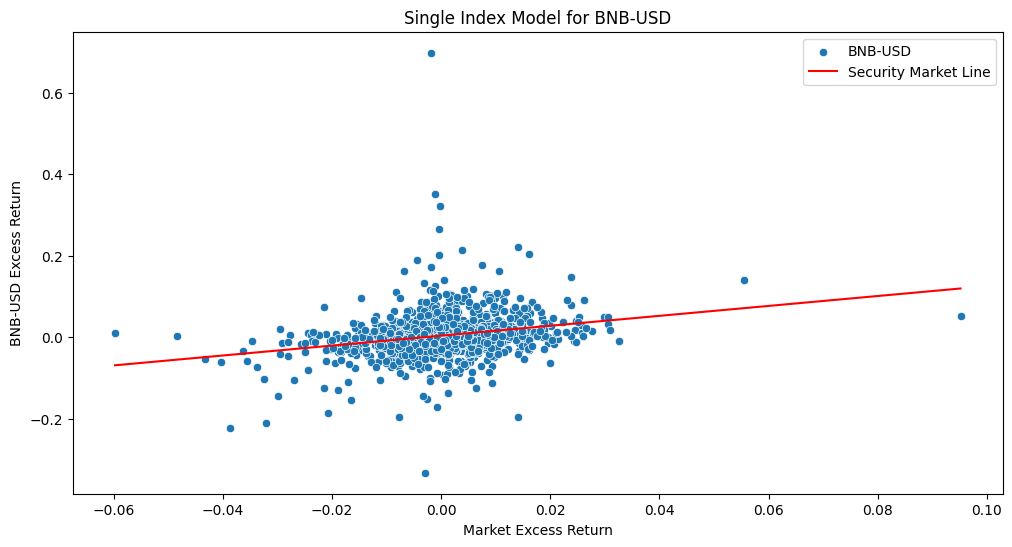

Returns for: SOL-USD, Date
2020-12-24    0.129980
2020-12-28    0.112504
2020-12-29    0.104679
2020-12-30   -0.082951
2020-12-31   -0.015995
                ...   
2025-09-15   -0.032792
2025-09-16    0.011231
2025-09-17    0.033199
2025-09-18    0.011352
2025-09-19   -0.036684
Name: SOL-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.124980
2020-12-28    0.107504
2020-12-29    0.099679
2020-12-30   -0.087951
2020-12-31   -0.020995
                ...   
2025-09-15   -0.037792
2025-09-16    0.006231
2025-09-17    0.028199
2025-09-18    0.006352
2025-09-19   -0.041684
Name: SOL-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


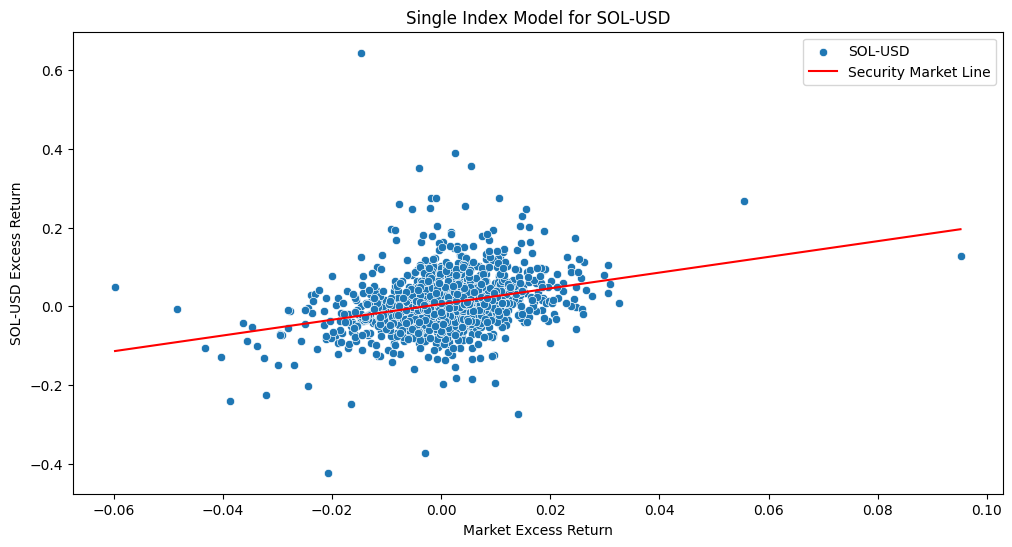

Returns for: USDC-USD, Date
2020-12-24    0.000135
2020-12-28    0.000027
2020-12-29   -0.000123
2020-12-30    0.000033
2020-12-31   -0.000204
                ...   
2025-09-15    0.000204
2025-09-16    0.000183
2025-09-17   -0.000266
2025-09-18   -0.000199
2025-09-19    0.000189
Name: USDC-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.004865
2020-12-28   -0.004973
2020-12-29   -0.005123
2020-12-30   -0.004967
2020-12-31   -0.005204
                ...   
2025-09-15   -0.004796
2025-09-16   -0.004817
2025-09-17   -0.005266
2025-09-18   -0.005199
2025-09-19   -0.004811
Name: USDC-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


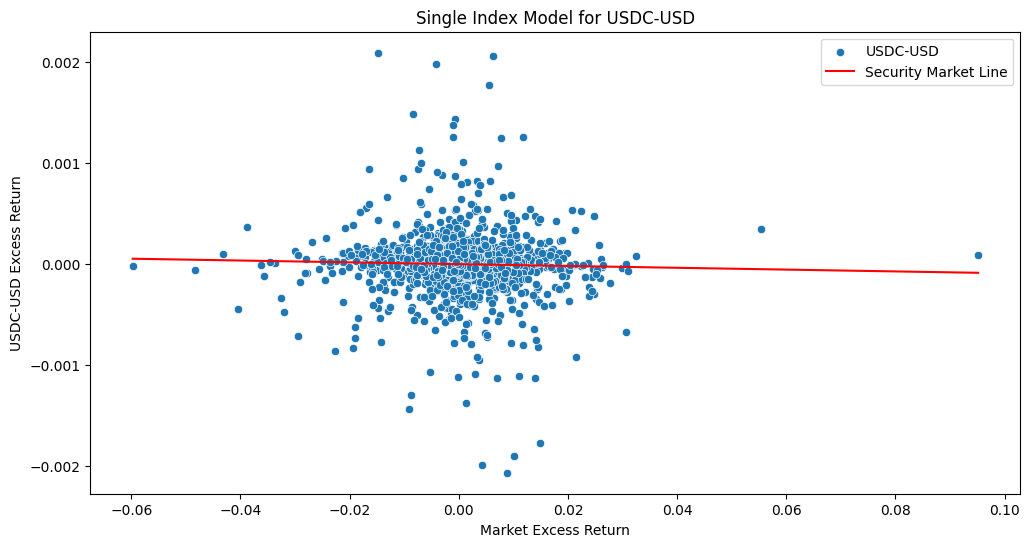

Returns for: STETH-USD, Date
2020-12-24    0.039297
2020-12-28    0.188442
2020-12-29   -0.008528
2020-12-30   -0.000356
2020-12-31    0.014450
                ...   
2025-09-15   -0.038033
2025-09-16   -0.004163
2025-09-17    0.019034
2025-09-18    0.000243
2025-09-19   -0.026940
Name: STETH-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.034297
2020-12-28    0.183442
2020-12-29   -0.013528
2020-12-30   -0.005356
2020-12-31    0.009450
                ...   
2025-09-15   -0.043033
2025-09-16   -0.009163
2025-09-17    0.014034
2025-09-18   -0.004757
2025-09-19   -0.031940
Name: STETH-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: D

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


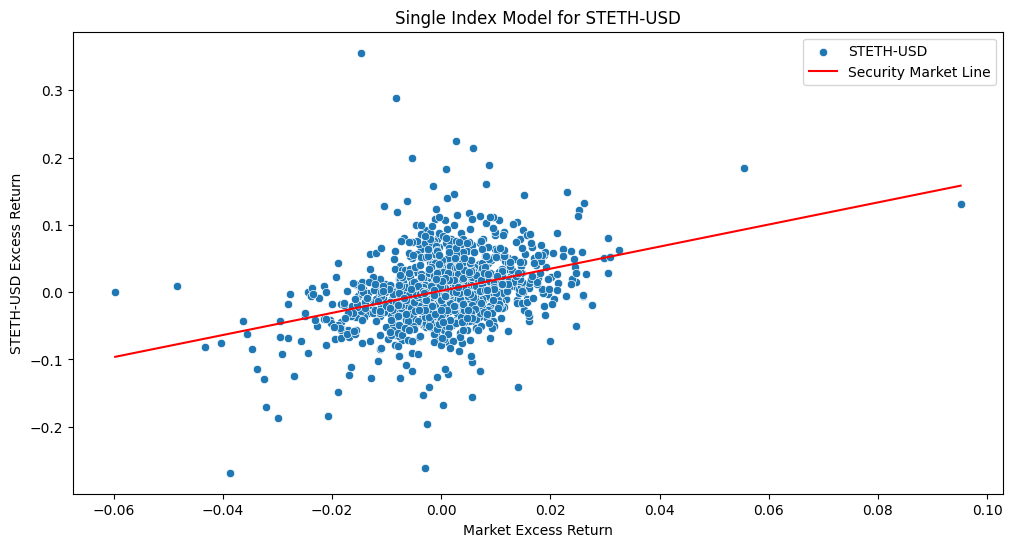

Returns for: TRX-USD, Date
2020-12-24    0.115915
2020-12-28    0.066253
2020-12-29   -0.062373
2020-12-30   -0.026905
2020-12-31   -0.004157
                ...   
2025-09-15   -0.022068
2025-09-16   -0.006876
2025-09-17    0.002791
2025-09-18    0.020610
2025-09-19   -0.018724
Name: TRX-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.110915
2020-12-28    0.061253
2020-12-29   -0.067373
2020-12-30   -0.031905
2020-12-31   -0.009157
                ...   
2025-09-15   -0.027068
2025-09-16   -0.011876
2025-09-17   -0.002209
2025-09-18    0.015610
2025-09-19   -0.023724
Name: TRX-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
20

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


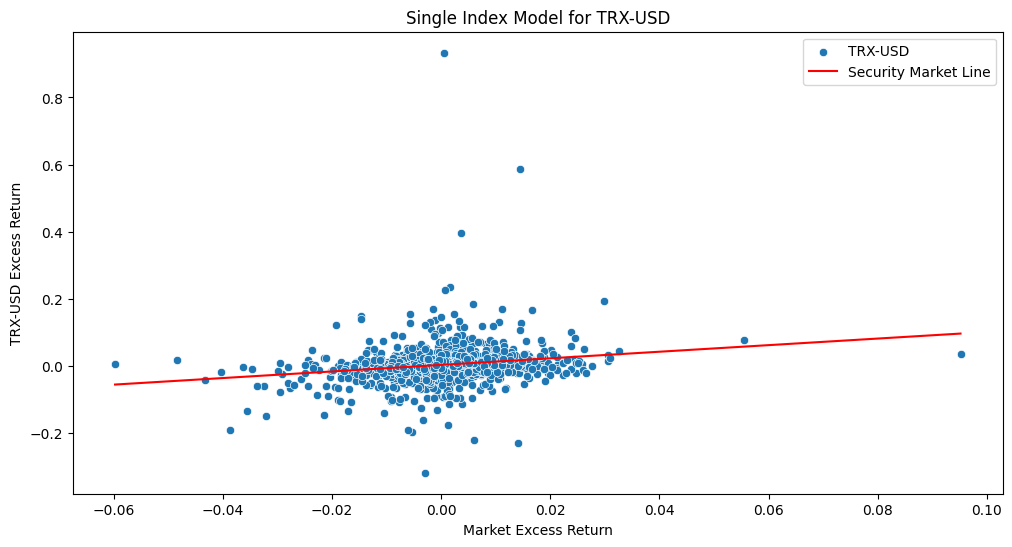

Returns for: LINK-USD, Date
2020-12-24    0.068703
2020-12-28    0.090962
2020-12-29   -0.067883
2020-12-30   -0.043968
2020-12-31    0.001507
                ...   
2025-09-15   -0.061716
2025-09-16   -0.003829
2025-09-17    0.020975
2025-09-18    0.027216
2025-09-19   -0.046414
Name: LINK-USD, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24    0.063703
2020-12-28    0.085962
2020-12-29   -0.072883
2020-12-30   -0.048968
2020-12-31   -0.003493
                ...   
2025-09-15   -0.066716
2025-09-16   -0.008829
2025-09-17    0.015975
2025-09-18    0.022216
2025-09-19   -0.051414
Name: LINK-USD, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


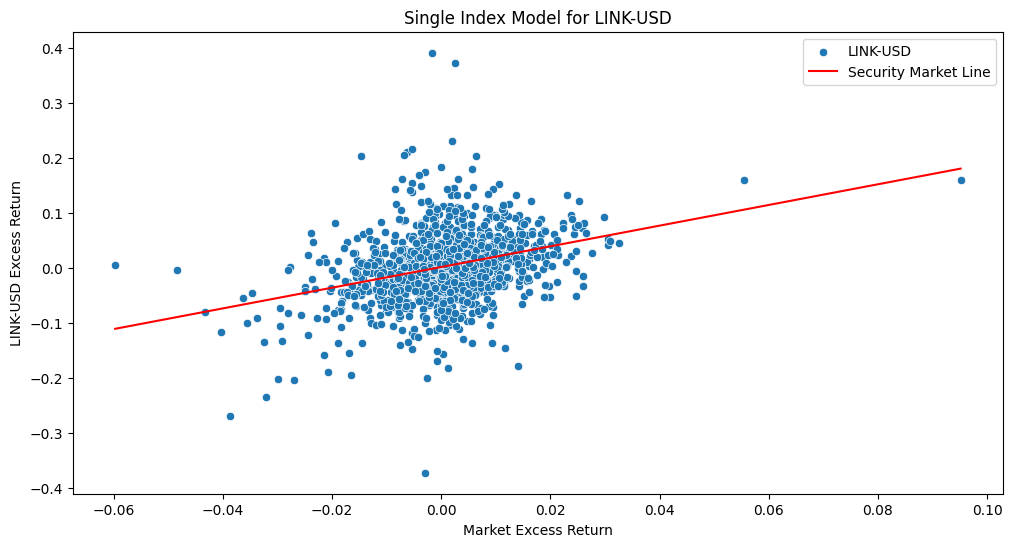

Returns for: ^GSPC, Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64
Excess Returns: Date
2020-12-24   -0.001463
2020-12-28    0.003723
2020-12-29   -0.007227
2020-12-30   -0.003658
2020-12-31    0.001439
                ...   
2025-09-15   -0.000293
2025-09-16   -0.006288
2025-09-17   -0.005970
2025-09-18   -0.000211
2025-09-19   -0.000115
Name: ^GSPC, Length: 1189, dtype: float64
Market Returns: ^GSPC,Date
2020-12-24    0.003537
2020-12-28    0.008723
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
                ...   
2025-09-15    0.004707
2025-09-16   -0.001288
2025-09-17   -0.000970
2025-09-18    0.004789
2025-09-19    0.004885
Name: ^GSPC, Length: 1189, dtype: float64;----- Market Excess Returns: Date
2020-12-

/home/nick/portfolio_optimization/venv/lib/python3.12/site-packages/pypfopt/expected_returns.py:137: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)


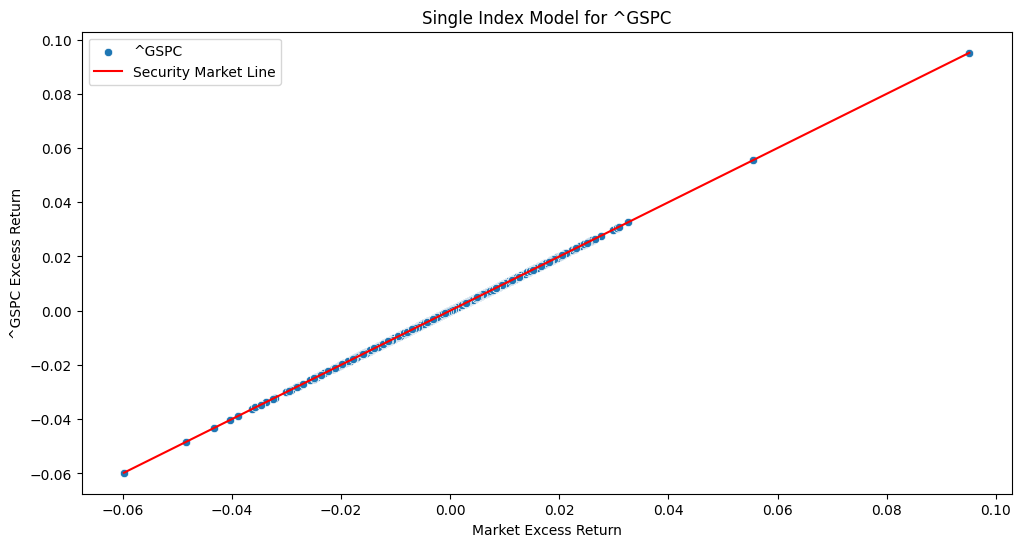

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from src.config import load_config
import numpy as np
from pypfopt import expected_returns
import os
import yfinance as yf

class Sim:
    def __init__(self,config):
        self.config = config


    def fetch_yfinance_data(self):
        """ Fetch Data from yfinance API """
        
        # all prices include SP&500
        self.all_prices = yf.download(tickers=self.config['combined_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.all_prices = self.all_prices.dropna()
        self.all_prices.drop_duplicates(inplace=True)

        return self.all_prices


    def single_index_model(self,output_dir="images/sim/"):

        #tickers to turn data into correct frame

        sp500_ticker = self.config['sp500_ticker']
        tickers = self.config['combined_tickers']
        risk_free_rate = self.config['risk_free_rate']

        # sp500 data
        self.sp500_data = self.all_prices[sp500_ticker]
        # Market Returns(sp500) and Market Excess Returns
        market_returns = self.sp500_data.pct_change().dropna()
        market_excess_returns = self.sp500_data.pct_change().dropna()

        #market index risk is of the sp500(variance(sp500))
        market_index_risk = np.var(market_returns)
        print(f'Market Index Risk: {market_index_risk}')




        # alphas, betas, total risk, covariance, market index risk,firm specific risk,product of betas
        alphas = {}
        betas = {}
        error_terms = {}
        adjusted_betas = {}
        firm_specific_risks = {}
        systematic_risks = {}
        total_risks = {}
        product_of_betas = {}
        risk_premiums = {}
        Expected_Returns = {}
    







        for ticker in tickers:
            asset_data = self.all_prices[ticker]
            returns = asset_data.pct_change().dropna()
            Excess_Returns = asset_data.pct_change().dropna() - risk_free_rate
            print(f'Returns for: {ticker}, {returns}')
            print(f'Excess Returns: {Excess_Returns}')
            print(f'Market Returns: {sp500_ticker},{market_returns};----- Market Excess Returns: {market_excess_returns}')



            model = sm.OLS(exog=sm.add_constant(market_returns),endog=returns).fit()
            

            # alpha, beta, error-term (e), firm-specific risk(variance(e)), market risk(variance of sp500 in this case).
            # risk premium: E(R) - Rf
            alpha = model.params.const
            beta = model.params.iloc[1]
            residuals = model.resid
            




            #adjusted beta: 2/3 * beta + 1/3 * 1
            adj_beta = (2/3) * beta + (1/3) * 1


            # Systematic risk is (Beta**2) * Market Index Risk (defined above)
            systematic_risk = (beta**2) * market_index_risk

            #  firm-specific risk is the variance of the "Unanticipated surpises" (the variance of the residuals for the asset)
            firm_specific_risk = np.var(residuals)

            # total risk = systematic Risk + Firm Specific Risk
            total_risk = systematic_risk + firm_specific_risk






            alphas[ticker] = alpha
            betas[ticker] = beta
            error_terms[ticker] = residuals
            adjusted_betas[ticker] = adj_beta
            systematic_risks[ticker] = systematic_risk
            firm_specific_risks[ticker] = firm_specific_risk
            total_risks[ticker] = total_risk

            print(f'Alpha Value: {alpha:.4f}')
            print(f'Beta Value: {beta:.4f}')
            print(f'Adjusted Beta: {adj_beta:4f}')
            print(f'Firm Specific Risk: {firm_specific_risk:.4f}')
            print(f'Systematic Risk: {systematic_risk:.4f}')
            print(f'Total Risk: {total_risk}')
            print(f'Error Term: {residuals}')

            


        

            # E(r) -> The Expected Return using pyportfolio & Risk Premiun = E(r) - rf 
            Expected_Return = expected_returns.mean_historical_return(asset_data)
            risk_premium = Expected_Return - risk_free_rate

            Expected_Returns[ticker] = Expected_Return
            risk_premiums[ticker] = risk_premium
            

            
            # for the individual betas and alphas

            print(f'ANOVA Table: {model.summary()}')
            print(f'R2 Score: {model.rsquared*100:.2f}')
            print(f'Expected Return: {Expected_Return}')


            



            ## plots
            plt.figure(figsize=(12,6))
            sns.scatterplot(x=market_returns, y=returns, label=ticker)
            sns.lineplot(x=market_returns, y=model.fittedvalues, color='red', label='Security Market Line')
                
            plt.title(f'Single Index Model for {ticker}')
            plt.xlabel('Market Excess Return')
            plt.ylabel(f'{ticker} Excess Return')
            plt.legend()
            plt.show()





    








        

if __name__ == "__main__":
    config = load_config()
    sim_config = Sim(config)
    sim_config.fetch_yfinance_data()
    sim_config.single_index_model()

